In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [26]:
student_ranks_histogram_bins_a = [0.10, 0.41, 0, 0.334]
student_ranks_histogram_bins_b = [0.11, 0.45, 0.12, 0.345]

In [2]:
# KL divergence
def kl(p, q):
    # Avoid divide by zero and invalid values in the logarithm
    mask = np.logical_and(p != 0, q != 0)
    result = np.sum(np.where(mask, p * np.log(p / q), 0))
    return result

In [ ]:
# practice: we have weight-height.csv and for this check that height of Male it follows normal distribution or not with KL divergence?

In [3]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [104]:
data.groupby('Gender').mean()

,Height,Weight
Gender,,
Female,63.708774,135.860093
Male,69.026346,187.020621


<Axes: >

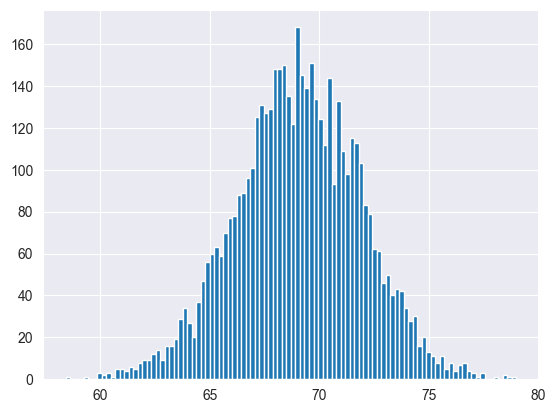

In [5]:
males_height = data[data['Gender'] == 'Male']['Height']
males_height.hist(bins=100)

In [81]:
males_height.describe()['mean']

69.02634590621741

In [82]:
males_height.describe()['std']

2.863362228660647

In [6]:
count, devision = np.histogram(males_height, bins=100)
print(f'count: {count}')
print(f'devision: {devision}')

count: [  1   0   0   0   1   0   0   3   2   3   1   5   5   4   6   5   8   9
   9  12  14   9  16  16  19  29  34  27  20  37  47  56  60  63  59  70
  77  78  88  89  96 101 125 131 127 129 148 148 150 135 122 168 145 139
 151 134 124 112 144  93 133 109  98 115 113 103  83  79  62  61  46  50
  40  43  42  34  28  30  16  20  13  11   8  11   5   8   4   7   8   4
   3   1   3   0   0   1   0   2   1   1]
devision: [58.40690493 58.61282331 58.81874168 59.02466005 59.23057843 59.4364968
 59.64241518 59.84833355 60.05425192 60.2601703  60.46608867 60.67200705
 60.87792542 61.0838438  61.28976217 61.49568054 61.70159892 61.90751729
 62.11343567 62.31935404 62.52527241 62.73119079 62.93710916 63.14302754
 63.34894591 63.55486429 63.76078266 63.96670103 64.17261941 64.37853778
 64.58445616 64.79037453 64.9962929  65.20221128 65.40812965 65.61404803
 65.8199664  66.02588478 66.23180315 66.43772152 66.6436399  66.84955827
 67.05547665 67.26139502 67.46731339 67.67323177 67.87915014 68.08

In [10]:
ideal = norm.rvs(size=len(males_height), loc=males_height.describe()['mean'], scale=males_height.describe()['std'])
ideal

array([67.2326042 , 67.35639828, 69.23320512, ..., 61.6485119 ,
       73.77111316, 68.39314416])

In [11]:
icount, idevision = np.histogram(ideal, bins=100)
print(f'icount: {icount}')
print(f'idevision: {idevision}')

icount: [  1   0   0   0   0   0   0   0   0   1   0   4   4   1   4   6   6   6
   7  10   6   6   9  18  13  19  14  21  20  27  45  30  41  44  58  61
  63  60  65  82  96  96  96 120 120 139 117 102 133 122 139 124 129 140
 158 151 136 134 124 133 130 140 122 113 114  83  99 102  82  76  71  72
  65  50  51  39  42  48  43  26  31  25  18  20  17  10   7   7   6   7
   5   4   5   2   2   1   1   1   1   1]
idevision: [58.03113746 58.23216634 58.43319523 58.63422411 58.83525299 59.03628188
 59.23731076 59.43833965 59.63936853 59.84039742 60.0414263  60.24245518
 60.44348407 60.64451295 60.84554184 61.04657072 61.24759961 61.44862849
 61.64965737 61.85068626 62.05171514 62.25274403 62.45377291 62.6548018
 62.85583068 63.05685957 63.25788845 63.45891733 63.65994622 63.8609751
 64.06200399 64.26303287 64.46406176 64.66509064 64.86611952 65.06714841
 65.26817729 65.46920618 65.67023506 65.87126395 66.07229283 66.27332171
 66.4743506  66.67537948 66.87640837 67.07743725 67.27846614 67.4

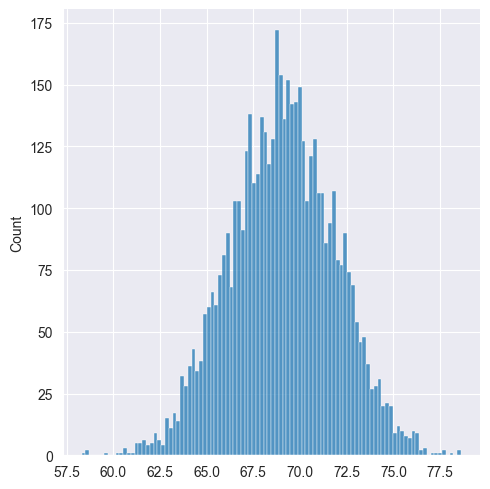

In [95]:
sns.displot(ideal, bins=100)

In [96]:
kl(count, icount)

/tmp/ipykernel_10713/559576496.py:5: RuntimeWarning: divide by zero encountered in divide
  result = np.sum(np.where(mask, p * np.log(p / q), 0))
/tmp/ipykernel_10713/559576496.py:5: RuntimeWarning: invalid value encountered in divide
  result = np.sum(np.where(mask, p * np.log(p / q), 0))
/tmp/ipykernel_10713/559576496.py:5: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(mask, p * np.log(p / q), 0))
/tmp/ipykernel_10713/559576496.py:5: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(mask, p * np.log(p / q), 0))


105.85584465229635

In [106]:
data.groupby('Gender').count()

,Height,Weight
Gender,,
Female,5000,5000
Male,5000,5000


In [12]:
# calculate probability
count = count / count.sum()
icount = icount / icount.sum()

In [13]:
kl(count, icount)

/tmp/ipykernel_16087/559576496.py:5: RuntimeWarning: divide by zero encountered in divide
  result = np.sum(np.where(mask, p * np.log(p / q), 0))
/tmp/ipykernel_16087/559576496.py:5: RuntimeWarning: invalid value encountered in divide
  result = np.sum(np.where(mask, p * np.log(p / q), 0))
/tmp/ipykernel_16087/559576496.py:5: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(mask, p * np.log(p / q), 0))
/tmp/ipykernel_16087/559576496.py:5: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(mask, p * np.log(p / q), 0))


0.03451691070195356

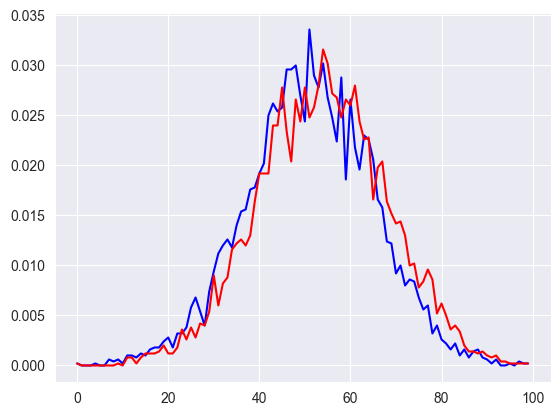

In [14]:
plt.plot(count, c='blue')
plt.plot(icount, c='red')

In [7]:
# so the kl value is 3% and the both histograms are about same so the males_height follows normal distribution